### Feature scaling 

#### Data transformations

* If needed, perform math operations: log, square root, addition, multiplication, etc.
* * Be careful as you'll get results in different dimensions
* Normalizing scores (such as using Z-scores) is recommended in most cases
* * It's much better for ML algorithms to have data of similar scales
* * You can do that manually or use a library (such as sklearn.preprocessing)
* By convention, calculated columns are added to the dataset
* The quality of our results depends strongly on the features we use ("Garbage in – garbage out")
* Dimensionality reduction - Reducing the number of variables (features)
* * Feature selection - Selecting only columns that are useful
* * Feature extraction - Getting meaningful features after transformation of raw data (such as non-structured to structured data) 
* Feature engineering - Using our knowledge of the data to create meaningful features (involves a lot of testing)

#### Describe all operations as you're doing them

* Describe what you're doing and why
* * Useful to check your work later (or allow others to do that)
* * If needed, save the resulting dataset into a file
* * Supply your data transformation log 
* * Provide a dataset description

#### Outliers and Errors 

* Outliers – values which are far from their expected range or having a very low probability of happening (assuming a model)
* Many possible cases
* * Wrong data entry (e.g. an adult weighing 5kg might be 50kg or something else)
* *  Wrong assumptions (the data is correct, our view isn't)
* What to do?
* * Inspect the data point and try to figure out what happened
* * If needed, remove the row or try to replace the value
* * Try a transformation
* * If possible, perform analysis with and without the outlier(s) and compare your results

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('../data/3_08/homeprices.csv')
data.head(20)

,area,bedrooms,floors,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
5,1314.0,2.0,1.0,14.0,415.0
6,864.0,2.0,1.0,66.0,230.0
7,1836.0,3.0,1.0,17.0,560.0
8,1026.0,3.0,1.0,43.0,294.0
9,3194.0,4.0,2.0,87.0,718.2


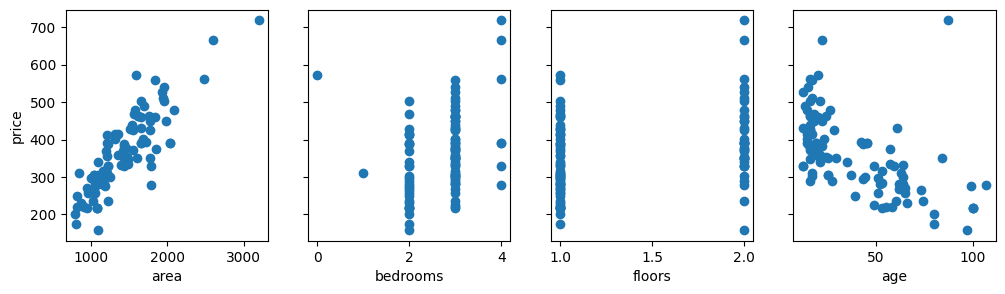

In [13]:
# Split data to features and target
X = np.array(data.iloc[:, 0:4])
X_cols = ['area', 'bedrooms', 'floors', 'age']
y = np.array(data.iloc[:, 4]) # 'price'

# Plot
fig, ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i], y)
    ax[i].set_xlabel(X_cols[i])
ax[0].set_ylabel("price")
plt.show()

# Increasing size also increases price. 
# Number of bedrooms and floors don't seem to have strong impact on price. 
# Newer houses have higher prices than older ones.

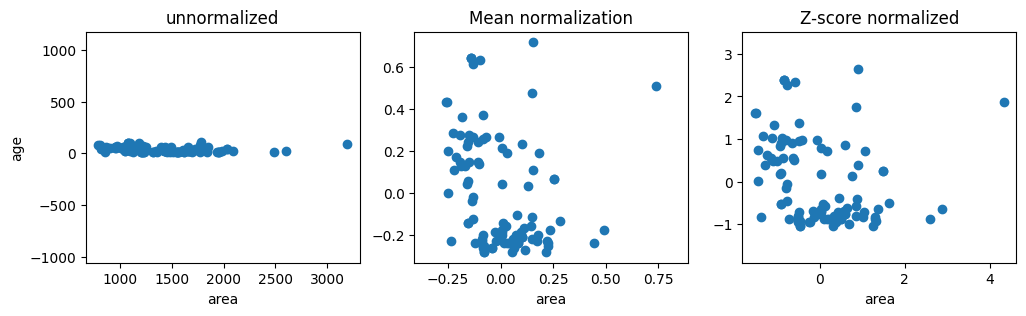

In [12]:
# Find the mean of each feature (i.e. per column) with shape (n,)
mu = np.mean(X, axis=0) 

# Find the standard deviation of each feature (i.e. per column) with shape (n,)
sigma = np.std(X, axis=0) 

# Find max value per column/feature with shape (n,)
maxv = np.max(X, axis=0)

# Find min value per column/feature with shape (n,)
minv = np.min(X, axis=0)

# Element-wise, apply mean normalization per feature/column
X_mean = (X - mu)/(maxv - minv)

# Element-wise, apply z-score normalization per feature/column
X_znorm = (X - mu)/sigma      

# Plot
fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X[:,0], X[:,3])
ax[0].set_xlabel(X_cols[0]); 
ax[0].set_ylabel(X_cols[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')
ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_cols[0]);  
ax[1].set_title("Mean normalization")
ax[1].axis('equal')
ax[2].scatter(X_znorm[:,0], X_znorm[:,3])
ax[2].set_xlabel(X_cols[0]); 
ax[2].set_title("Z-score normalized")
ax[2].axis('equal') 
plt.show()

### sklearn.preprocessing

#### StandardScaler
* Standardizes features by removing the mean and scaling to unit variance (mean = 0, variance = 1)
* Use when data is normally distributed

#### MinMaxScaler
* Scales features to a fixed range (usually 0 to 1) 
* Use when you want to preserve the shape of the original distribution but bring everything to the same scale 

#### RobustScaler
* Scales using median and IQR (interquartile range)
* Use when data has outliers 

#### Normalizer
* Scales each data sample (row) to unit norm (vector length = 1)
* Use when you need to normalize samples rather than features (e.g., in text classification)

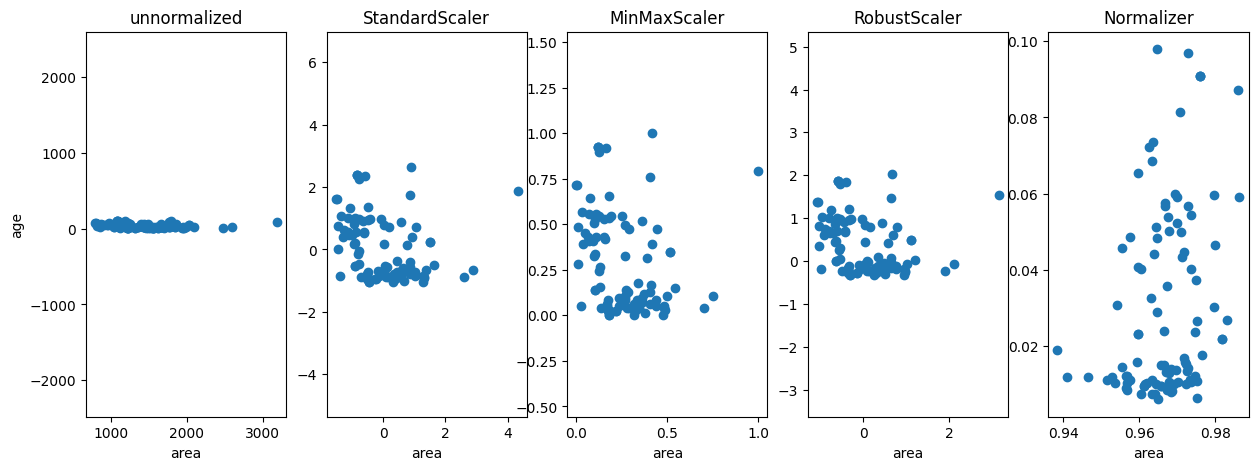

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

scaler = StandardScaler()
ss_X = scaler.fit_transform(X) 

scaler = MinMaxScaler()
mms_X = scaler.fit_transform(X) 

scaler = RobustScaler()
rs_X = scaler.fit_transform(X)

scaler = Normalizer()
n_data = scaler.fit_transform(data)

# Plot
fig,ax=plt.subplots(1, 5, figsize=(15, 5))
ax[0].scatter(X[:,0], X[:,3])
ax[0].set_xlabel(X_cols[0]); 
ax[0].set_ylabel(X_cols[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')
ax[1].scatter(ss_X[:,0], ss_X[:,3])
ax[1].set_xlabel(X_cols[0]);  
ax[1].set_title("StandardScaler")
ax[1].axis('equal')
ax[2].scatter(mms_X[:,0], mms_X[:,3])
ax[2].set_xlabel(X_cols[0]); 
ax[2].set_title("MinMaxScaler")
ax[2].axis('equal') 
ax[3].scatter(rs_X[:,0], rs_X[:,3])
ax[3].set_xlabel(X_cols[0]);  
ax[3].set_title("RobustScaler")
ax[3].axis('equal')
ax[4].scatter(n_data[:,0], n_data[:,3])
ax[4].set_xlabel(X_cols[0]); 
ax[4].set_title("Normalizer")
ax[4].axis('equal') 
plt.show()